In [1]:
# 范例：随机漫步
import matplotlib.pyplot as plt
import numpy as np

% matplotlib inline

In [2]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps) # 取值范围[0, 2)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

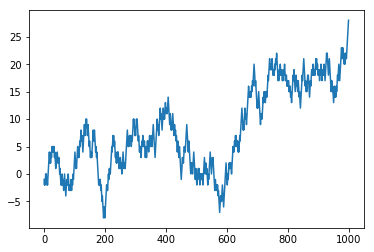

In [3]:
plt.plot(walk)

In [4]:
print(walk.min())
print(walk.max())
(np.abs(walk) >= 10).argmax() # 看下第几部走到最远位置，无论正负。

-8
28


137

In [5]:
# 一次模拟多个随机漫步

In [6]:
nwalks = 5 # 同时模拟5个
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1) # 沿着行的方向做累加
print(walks.max())
print(walks.min())

106
-49


In [7]:
hits30 = (np.abs(walks) >= 30).any(1) # 看看有哪几路最远距离超过30
print(hits30.sum())
hits30

4


array([ True,  True,  True, False,  True], dtype=bool)

In [8]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1) # 最大距离超过30的穿越时间
crossing_times

array([413, 379, 805, 671], dtype=int64)

In [9]:
steps = np.random.normal(loc=0,
                         scale=0.25,
                         size=(nwalks, nsteps)) # 可以尝试用正态分布的方法生成数据